<a href="https://colab.research.google.com/github/vujjiniashrith/ESS-profit-maximaization-using-deep-Reinforcemetn-Learning/blob/main/LSTM_pricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
df1 = pd.read_csv("da_hrl_lmps_2.csv")


In [ ]:
df2 = pd.read_csv("da_hrl_lmps _1.csv")

In [ ]:
df1.head()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,row_is_current,version_nbr
0,1/1/2022 5:00:00 AM,1/1/2022 12:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,21.02,19.94,-0.53,-0.55,True,1
1,1/1/2022 6:00:00 AM,1/1/2022 1:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,18.43,17.80,-0.01,-0.62,True,1
2,1/1/2022 7:00:00 AM,1/1/2022 2:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,18.11,17.47,0.00,-0.64,True,1
3,1/1/2022 8:00:00 AM,1/1/2022 3:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,18.15,17.31,-0.11,-0.73,True,1
4,1/1/2022 9:00:00 AM,1/1/2022 4:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,17.70,17.06,0.06,-0.70,True,1


In [ ]:
df2.head()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,row_is_current,version_nbr
0,1/1/2023 5:00:00 AM,1/1/2023 12:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,24.21,23.62,-0.22,-0.37,True,1
1,1/1/2023 6:00:00 AM,1/1/2023 1:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,23.54,23.19,-0.13,-0.22,True,1
2,1/1/2023 7:00:00 AM,1/1/2023 2:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,22.84,22.11,-0.38,-0.35,True,1
3,1/1/2023 8:00:00 AM,1/1/2023 3:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,22.70,21.79,-0.52,-0.39,True,1
4,1/1/2023 9:00:00 AM,1/1/2023 4:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,22.71,22.08,-0.24,-0.39,True,1


In [ ]:
df = pd.concat([df1,df2])
df = df.reset_index(drop = True)

In [ ]:
df.tail()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,row_is_current,version_nbr
14756,9/9/2023 12:00:00 AM,9/8/2023 8:00:00 PM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,34.58,29.99,-5.73,1.14,True,1
14757,9/9/2023 1:00:00 AM,9/8/2023 9:00:00 PM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,29.40,28.12,-1.91,0.63,True,1
14758,9/9/2023 2:00:00 AM,9/8/2023 10:00:00 PM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,25.86,25.74,-0.63,0.51,True,1
14759,9/9/2023 3:00:00 AM,9/8/2023 11:00:00 PM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,22.68,23.16,0.06,0.42,True,1
14760,9/9/2023 4:00:00 AM,9/9/2023 12:00:00 AM,48612,BRIDGEWA,230 KV,26KV,LOAD,PSEG,24.02,22.96,-1.43,0.37,True,1


In [ ]:
df.shape

(14761, 14)

In [ ]:
columns = df.columns

In [ ]:
columns

Index(['datetime_beginning_utc', 'datetime_beginning_ept', 'pnode_id',
       'pnode_name', 'voltage', 'equipment', 'type', 'zone',
       'system_energy_price_da', 'total_lmp_da', 'congestion_price_da',
       'marginal_loss_price_da', 'row_is_current', 'version_nbr'],
      dtype='object')

In [ ]:
columns_to_drop = ['datetime_beginning_utc', 'pnode_id',
       'pnode_name', 'voltage', 'equipment', 'type', 'zone',
        'total_lmp_da', 'congestion_price_da',
       'marginal_loss_price_da', 'row_is_current', 'version_nbr']

In [ ]:
df = df.drop(columns = columns_to_drop)

In [ ]:
df.shape

(14761, 2)

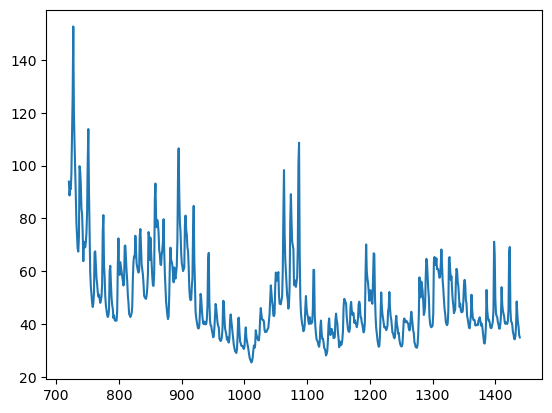

In [ ]:
plt.plot(df['system_energy_price_da'][720:720*2])

In [ ]:
columns_to_name = ['datetime','price']

In [ ]:
df.columns = columns_to_name

In [ ]:
df[df.datetime.isnull()==True]#greatest dataset ever no null values

,datetime,price


In [ ]:
df = df.price
df

0        21.02
1        18.43
2        18.11
3        18.15
4        17.70
         ...  
14756    34.58
14757    29.40
14758    25.86
14759    22.68
14760    24.02
Name: price, Length: 14761, dtype: float64

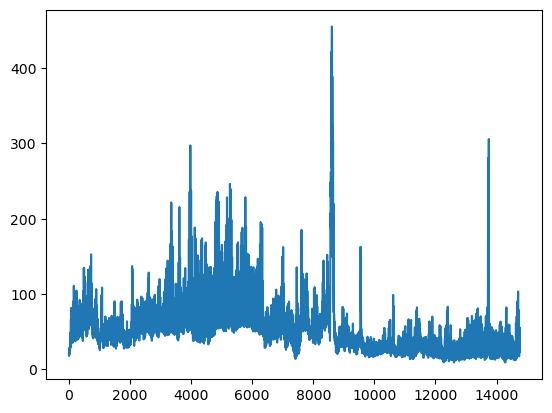

In [ ]:
plt.plot(df)

<AxesSubplot:>

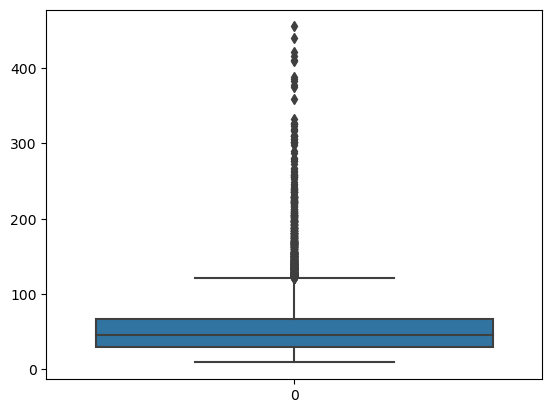

In [ ]:
sns.boxplot(data = df.price)

In [ ]:
##scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df1

array([[0.02669266],
       [0.02088796],
       [0.02017078],
       ...,
       [0.03754006],
       [0.03041305],
       [0.03341626]])

In [ ]:
total_size = len(df1)
training_size = int(total_size * 0.70)
valid_size = int(total_size * 0.20)
test_size = total_size - training_size - valid_size

train_data = df1[0:training_size,:]
valid_data = df1[training_size:training_size+valid_size,:]
test_data = df1[training_size+valid_size : ,:]

In [ ]:
train_data.shape

(10332, 1)

In [ ]:
valid_data.shape

(2952, 1)

In [ ]:
test_data.shape

(1477, 1)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=None):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----23   24
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 24
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(valid_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(10307, 24)
(10307,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(24,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 24, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=64,verbose=1)

Epoch 1/60
162/162 [==============================] - 13s 52ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 2/60
162/162 [==============================] - 7s 46ms/step - loss: 0.0015 - val_loss: 2.4050e-04
Epoch 3/60
162/162 [==============================] - 7s 46ms/step - loss: 0.0012 - val_loss: 2.2443e-04
Epoch 4/60
162/162 [==============================] - 7s 44ms/step - loss: 0.0012 - val_loss: 2.1096e-04
Epoch 5/60
162/162 [==============================] - 7s 45ms/step - loss: 7.7862e-04 - val_loss: 1.4746e-04
Epoch 6/60
162/162 [==============================] - 7s 42ms/step - loss: 5.3889e-04 - val_loss: 1.2362e-04
Epoch 7/60
162/162 [==============================] - 7s 43ms/step - loss: 4.6454e-04 - val_loss: 9.9047e-05
Epoch 8/60
162/162 [==============================] - 7s 43ms/step - loss: 4.2469e-04 - val_loss: 1.3133e-04
Epoch 9/60
162/162 [==============================] - 7s 42ms/step - loss: 4.0677e-04 - val_loss: 1.2149e-04
Epoch 10/60
162/162 [=================

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
val_predict=model.predict(X_val)
test_predict = model.predict(X_test)

46/46 [==============================] - 0s 8ms/step


In [ ]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
val_predict=scaler.inverse_transform(val_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
train_predict.shape, y_train.shape


((10307, 1), (10307,))

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))

6.8098860102203425

In [ ]:
math.sqrt(mean_squared_error(scaler.inverse_transform(y_val.reshape(-1,1)),val_predict))

4.164775090614649

In [ ]:
math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))

7.363189919307196

In [ ]:
test_predict.shape

(1452, 1)

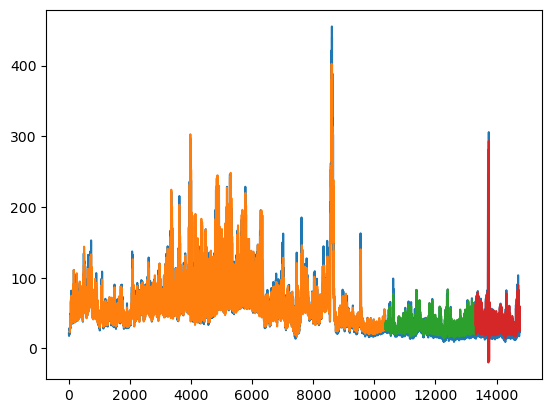

In [ ]:
### Plotting
# # shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift validation predictions for plotting
validPredictPlot = np.empty_like(df1)
validPredictPlot[:, :] = np.nan
validPredictPlot[len(train_predict)+(look_back*2)+1:training_size+valid_size-1, :] = val_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+valid_size+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(validPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

1477

In [ ]:
x_input=test_data[1453:].reshape(1,-1)
x_input.shape

(1, 24)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 24 hours

lst_output=[]
n_steps=24
i=0
while(i<24):

    if(len(temp_input)>24):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} hour input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} hour output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.04053498]
25
1 hour input [0.02167238 0.01810888 0.02028284 0.02821668 0.03644187 0.03541092
 0.03509716 0.03749524 0.0445326  0.05044936 0.0546404  0.07028396
 0.0783971  0.08917726 0.10455187 0.09937471 0.07835227 0.06613774
 0.05708331 0.0454739  0.03754006 0.03041305 0.03341626 0.04053498]
1 hour output [[0.04820202]]
2 hour input [0.01810888 0.02028284 0.02821668 0.03644187 0.03541092 0.03509716
 0.03749524 0.0445326  0.05044936 0.0546404  0.07028396 0.0783971
 0.08917726 0.10455187 0.09937471 0.07835227 0.06613774 0.05708331
 0.0454739  0.03754006 0.03041305 0.03341626 0.04053498 0.04820202]
2 hour output [[0.05472867]]
3 hour input [0.02028284 0.02821668 0.03644187 0.03541092 0.03509716 0.03749524
 0.0445326  0.05044936 0.0546404  0.07028396 0.0783971  0.08917726
 0.10455187 0.09937471 0.07835227 0.06613774 0.05708331 0.0454739
 0.03754006 0.03041305 0.03341626 0.04053498 0.04820202 0.05472867]
3 hour output [[0.05779465]]
4 hour input [0.02821668 0.03644187 0.03541092 0.0350

In [ ]:
day_new=np.arange(1,25)
day_pred=np.arange(25,49)

In [ ]:
len(df1)

14761

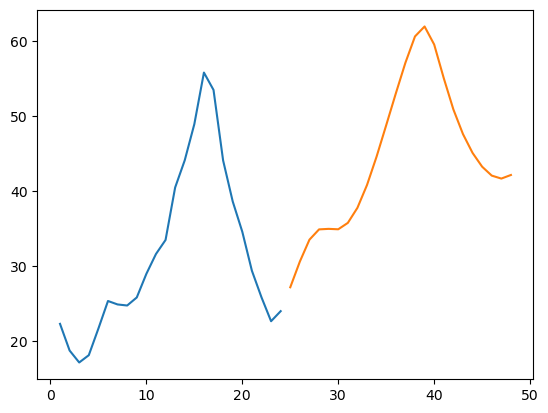

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[14761-24:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))